In [318]:
#Import Libraries

#Generic
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import zscore,normaltest

#Preprocess
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer

#Encoder
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

#Imputer
from sklearn.impute import SimpleImputer

#TrainTestSplit
from sklearn.model_selection import train_test_split,cross_val_score

#RegressionModels
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Optimize
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,f1_score

#Joblib
import joblib

%matplotlib inline

In [319]:
#Import data
df=pd.read_csv('heartdisease_data.csv',na_values='?')

In [320]:
#Check head
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0


In [321]:
#Check Info
df.info()
#In Sole ca and thal there are many null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  144 non-null    float64
 4   chol      193 non-null    float64
 5   fbs       193 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   147 non-null    float64
 8   exang     147 non-null    float64
 9   oldpeak   144 non-null    float64
 10  slope     98 non-null     float64
 11  ca        2 non-null      float64
 12  thal      34 non-null     float64
 13  goal      200 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 22.0 KB


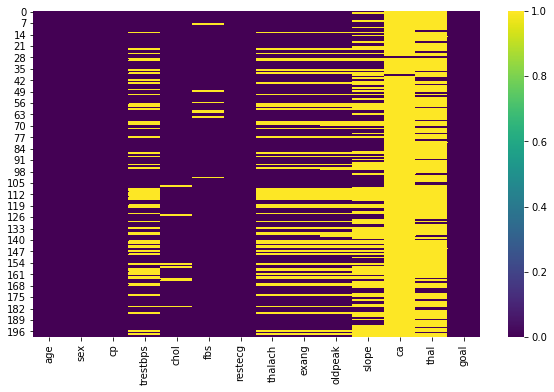

In [322]:
#Plot null values if any
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),cmap='viridis')
plt.show()

In [323]:
#Check null values
(df.isna().sum()/200)*100
#This are the percent of null values where in we can accept columns having <30% null values
#So we can directly drop slope, ca and thal columns

age          0.0
sex          0.0
cp           0.0
trestbps    28.0
chol         3.5
fbs          3.5
restecg      0.0
thalach     26.5
exang       26.5
oldpeak     28.0
slope       51.0
ca          99.0
thal        83.0
goal         0.0
dtype: float64

In [324]:
#Drop slope, ca and thal columns
df=df.drop(['slope','ca','thal'],axis=1)

In [325]:
#Check Stats
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,goal
count,200.000000,200.000000,200.000000,144.000000,193.000000,193.000000,200.000000,147.000000,147.000000,144.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.352332,0.735000,122.795918,0.646259,1.320833,1.520000
std,7.811697,0.171015,0.795701,21.537733,114.035232,0.478939,0.683455,21.990328,0.479765,1.106236,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,109.000000,0.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,1.500000,1.000000
75%,64.000000,1.000000,4.000000,147.000000,258.000000,1.000000,1.000000,140.000000,1.000000,2.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,4.000000


In [326]:
#As written in UCL documentation we are only checking if the heart disease is present or not
df.loc[(df['goal']==1)|(df['goal']==2)|(df['goal']==3)|(df['goal']==4),'goal']=1

In [327]:
df['goal'].value_counts()

1    149
0     51
Name: goal, dtype: int64

In [328]:
#We have null values in some of the columns which we will need to impute
si=SimpleImputer(strategy='mean')

In [329]:
for x in df.columns:
    if df.loc[:,x].isna().sum()>0:
        df.loc[:,x]=si.fit_transform(df.loc[:,x].values.reshape(-1,1))

In [330]:
#Check info again to check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    float64
 4   chol      200 non-null    float64
 5   fbs       200 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   200 non-null    float64
 8   exang     200 non-null    float64
 9   oldpeak   200 non-null    float64
 10  goal      200 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 17.3 KB


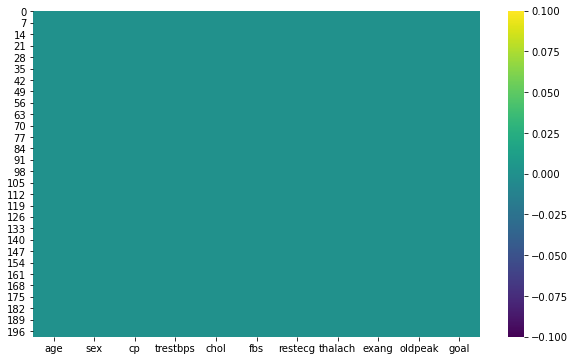

In [331]:
#Plot null values if any
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),cmap='viridis')
plt.show()

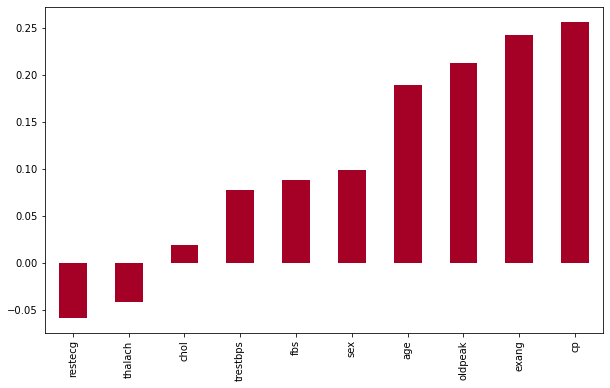

In [332]:
#Check correlation
plt.figure(figsize=(10,6))
df.corr()['goal'].sort_values().drop('goal').plot(kind='bar',cmap='RdYlGn')
plt.show()
#We can see the max correlated column is oldpeak

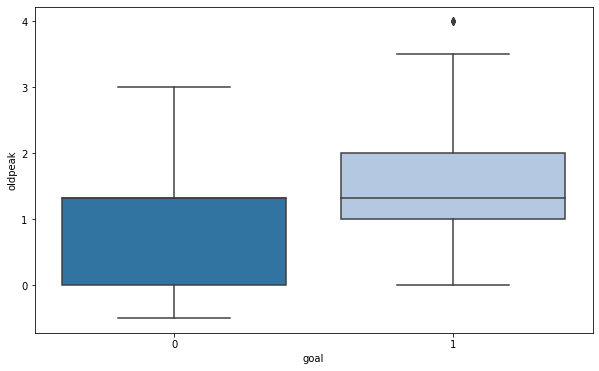

In [333]:
plt.figure(figsize=(10,6))
sns.boxplot(x='goal',y='oldpeak',data=df,palette='tab20')
plt.show()
#As we can see that the plot is almost linear. Let us check that with a jointplot

<Figure size 720x432 with 0 Axes>

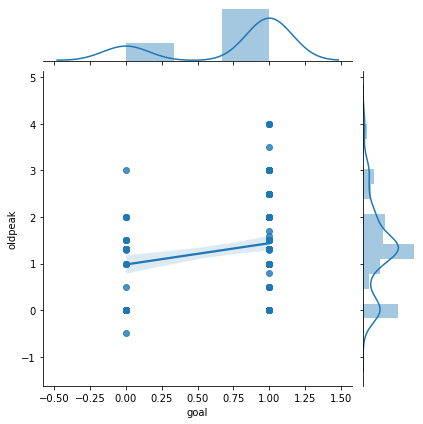

In [334]:
plt.figure(figsize=(10,6))
sns.jointplot(x='goal',y='oldpeak',data=df,kind='reg')
plt.show()
#As we can see that the plot is almost linear.

In [335]:
#Check skewness
df.skew().sort_values(ascending=False)

fbs         0.634130
oldpeak     0.423414
restecg     0.391463
thalach     0.148515
age        -0.404091
chol       -0.571879
exang      -0.719015
goal       -1.132724
trestbps   -1.511363
cp         -1.648734
sex        -5.552105
dtype: float64

In [336]:
#Correct skewness
pt=PowerTransformer()

In [337]:
for x in df.columns.drop('goal'):
    if abs(df.loc[:,x].skew())>0.55:
        df.loc[:,x]=pt.fit_transform(df.loc[:,x].values.reshape(-1,1))

In [338]:
df.skew()

age        -0.404091
sex        -5.552105
cp         -0.771030
trestbps    0.271482
chol       -0.946563
fbs         0.564242
restecg     0.391463
thalach     0.148515
exang      -0.450183
oldpeak     0.423414
goal       -1.132724
dtype: float64

In [339]:
#Bifurcate features and target
X=df.drop('goal',axis=1)
y=df['goal']

In [340]:
#Scale the data
si=MinMaxScaler()
X=si.fit_transform(X)

In [341]:
df.skew()

age        -0.404091
sex        -5.552105
cp         -0.771030
trestbps    0.271482
chol       -0.946563
fbs         0.564242
restecg     0.391463
thalach     0.148515
exang      -0.450183
oldpeak     0.423414
goal       -1.132724
dtype: float64

In [342]:
for x in df.columns.drop('goal'):
    if abs(df.loc[:,x].skew())>0.55:
        df.loc[:,x]=pt.fit_transform(df.loc[:,x].values.reshape(-1,1))

In [343]:
df.skew()

age        -0.404091
sex        -5.552105
cp         -0.665763
trestbps    0.271482
chol       -0.063466
fbs         0.531609
restecg     0.391463
thalach     0.148515
exang      -0.450183
oldpeak     0.423414
goal       -1.132724
dtype: float64

In [344]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=x)
        md=model
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        f1=f1_score(y_test,predict)
        avg=(confusion_matrix(y_test,predict)[0,0]+confusion_matrix(y_test,predict)[1,1])/(confusion_matrix(y_test,predict)[0,1]+confusion_matrix(y_test,predict)[1,0])
        if avg>max_score:
            max_score=avg
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [345]:
#Call the function
model_select(LogisticRegression(max_iter=2000))

Max score is 6.142857142857143 with random state 92


In [346]:
#Call the function
model_select(KNeighborsClassifier())

Max score is 9.0 with random state 92


In [347]:
#Call the function
model_select(SVC())

Max score is 6.142857142857143 with random state 54


In [348]:
#Call the function
model_select(DecisionTreeClassifier())

Max score is 4.0 with random state 54


In [349]:
#Call the function
model_select(RandomForestClassifier())

Max score is 7.333333333333333 with random state 77


In [350]:
#Call the function
model_select(AdaBoostClassifier())

Max score is 6.142857142857143 with random state 54


In [351]:
#Since we are getting accuracy below 90 we will try to select appropriate features
df.skew()
#As we can see sex column is very much skewed so it can cause overfitting the model

age        -0.404091
sex        -5.552105
cp         -0.665763
trestbps    0.271482
chol       -0.063466
fbs         0.531609
restecg     0.391463
thalach     0.148515
exang      -0.450183
oldpeak     0.423414
goal       -1.132724
dtype: float64

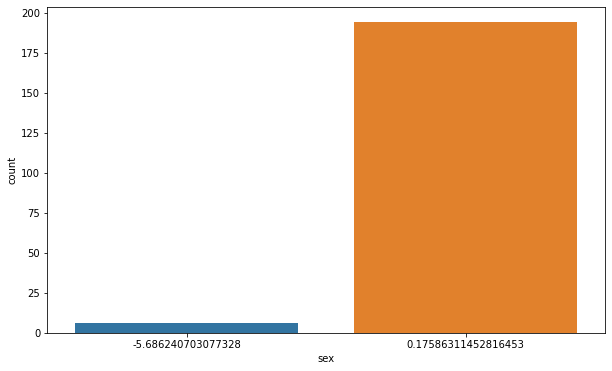

In [352]:
#As we can see that the sex column is still much skewed
plt.figure(figsize=(10,6))
sns.countplot(x='sex',data=df)
plt.show()
#As we can see that the sex column is very skewed it might cause overfitting the data.
#Hence we will drop sex column

In [353]:
#Drop sex column
df=df.drop('sex',axis=1)

In [354]:
#Call the function
model_select(LogisticRegression(max_iter=2000))

Max score is 6.142857142857143 with random state 92


In [355]:
#Call the function
model_select(KNeighborsClassifier())

Max score is 9.0 with random state 92


In [356]:
#Call the function
model_select(SVC())

Max score is 6.142857142857143 with random state 54


In [357]:
#Call the function
model_select(DecisionTreeClassifier())

Max score is 5.25 with random state 77


In [358]:
#Call the function
model_select(RandomForestClassifier())

Max score is 7.333333333333333 with random state 77


In [359]:
#Call the function
model_select(AdaBoostClassifier())

Max score is 6.142857142857143 with random state 54


In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=77)

In [366]:
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [367]:
predict=rf.predict(X_test)

In [368]:
print(confusion_matrix(y_test,predict))
print()
print(classification_report(y_test,predict))

[[ 5  4]
 [ 2 39]]

              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.91      0.95      0.93        41

    accuracy                           0.88        50
   macro avg       0.81      0.75      0.78        50
weighted avg       0.87      0.88      0.87        50



In [363]:
#As we can see that there is some improvement in KNeighborsClassifier we will try to hypertune it's parameter

In [373]:
# Create the random grid
#Since there are samples less then 200 we will only take neighbours till 100
random_grid = {'n_neighbors': [2,5,10,20,30,40,50,60,70,80,90,100]}

gscv=GridSearchCV(KNeighborsClassifier(),random_grid)

In [374]:
gscv.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                         90, 100]})

In [375]:
gscv_best=gscv.best_params_

In [376]:
gscv.best_params_

{'n_neighbors': 20}

In [378]:
kn=KNeighborsClassifier(n_neighbors=20)

In [379]:
kn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [380]:
predict=kn.predict(X_test)

In [381]:
print(confusion_matrix(y_test,predict))
print()
print(classification_report(y_test,predict))

[[ 4  5]
 [ 1 40]]

              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.89      0.98      0.93        41

    accuracy                           0.88        50
   macro avg       0.84      0.71      0.75        50
weighted avg       0.87      0.88      0.87        50



In [389]:
cross_val_score(kn,X_train,y_train,cv=10).mean()

0.74

In [382]:
#Save the model
joblib.dump(kn,'HeartDisease_KN.obj')

['HeartDisease_KN.obj']